In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

80.57627434928293 15.211337584663141
26.76969620195004 11.994546848624708
54.98734796170743 2.107021757395387
71.6511850484709 63.63346193632327
-86.89744072630307 49.912667294542956
-33.97637815176358 17.74723298358714
18.68682350467573 166.1142727796556
76.8132259525936 -89.65539947290374
69.61488191354172 128.90557517726126
-17.821942324594716 95.40309747280554
89.57947138609453 -135.00361719634154
54.96797828438898 117.50454002471173
60.55970130407772 92.82359837561376
21.678785144155526 170.7452953532307
-76.77966593281651 -86.88989537553948
44.193350556137915 -116.38775984146855
-23.182297903473156 -132.27545495579028
62.98455862013361 126.39821389968978
71.53126848791146 -149.67823537136752
40.8432033509734 122.28667898190747
45.58293865096229 -8.665570431627145
-49.08433661177717 -153.6156512822247
-3.434206982365339 141.8645008091052
-55.38418242545303 157.42256529667037
-48.29154610285645 11.94697989877173
-35.41771372094955 -176.44403094696315
-17.918933387064044 -147.743774

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count.

len(cities)

629

In [7]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [8]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1



# Loop through all the cities in our list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        

 
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

        
        
        
# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

    
    
    

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | awbari
Processing Record 3 of Set 1 | great yarmouth
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | labuhan
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | ksenyevka
City not found. Skipping...
Processing Record 13 of Set 1 | teya
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | emmett
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | berdigestyakh
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | yingkou
Processing Record 20 of Set 1 | naron
Processing Record 21 of Set 1 | mataura
Processing Record 22 of 

Processing Record 38 of Set 4 | temaraia
City not found. Skipping...
Processing Record 39 of Set 4 | warqla
City not found. Skipping...
Processing Record 40 of Set 4 | jackson
Processing Record 41 of Set 4 | lolua
City not found. Skipping...
Processing Record 42 of Set 4 | flinders
Processing Record 43 of Set 4 | tortoli
Processing Record 44 of Set 4 | porto novo
Processing Record 45 of Set 4 | nizwa
Processing Record 46 of Set 4 | yinchuan
Processing Record 47 of Set 4 | harboore
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | urumqi
Processing Record 50 of Set 4 | lautaro
Processing Record 1 of Set 5 | kalianget
Processing Record 2 of Set 5 | cadiz
Processing Record 3 of Set 5 | ofaqim
Processing Record 4 of Set 5 | goundam
Processing Record 5 of Set 5 | westport
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | mayo
Processing Record 8 of Set 5 | coahuayana
Processing Record 9 of Set 5 | port-gentil
Processing Record 10 of Set 5 | den

Processing Record 25 of Set 8 | diplo
Processing Record 26 of Set 8 | takoradi
Processing Record 27 of Set 8 | los llanos de aridane
Processing Record 28 of Set 8 | nagato
Processing Record 29 of Set 8 | lhokseumawe
Processing Record 30 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 31 of Set 8 | barra patuca
Processing Record 32 of Set 8 | lubumbashi
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | boyolangu
Processing Record 35 of Set 8 | abha
Processing Record 36 of Set 8 | boende
Processing Record 37 of Set 8 | tilichiki
Processing Record 38 of Set 8 | tazovskiy
Processing Record 39 of Set 8 | qufu
Processing Record 40 of Set 8 | el alto
Processing Record 41 of Set 8 | najran
Processing Record 42 of Set 8 | vagay
Processing Record 43 of Set 8 | teknaf
Processing Record 44 of Set 8 | artyk
City not found. Skipping...
Processing Record 45 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 8 | luau
Processing Record 47

Processing Record 11 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 12 of Set 12 | unguia
Processing Record 13 of Set 12 | nome
Processing Record 14 of Set 12 | charters towers
Processing Record 15 of Set 12 | merauke
Processing Record 16 of Set 12 | drawsko pomorskie
Processing Record 17 of Set 12 | sterling
Processing Record 18 of Set 12 | leshan
Processing Record 19 of Set 12 | montlucon
Processing Record 20 of Set 12 | san juan
Processing Record 21 of Set 12 | gorontalo
Processing Record 22 of Set 12 | beachwood
Processing Record 23 of Set 12 | pisco
Processing Record 24 of Set 12 | andenes
Processing Record 25 of Set 12 | coquimbo
Processing Record 26 of Set 12 | villazon
Processing Record 27 of Set 12 | kargil
Processing Record 28 of Set 12 | shaunavon
Processing Record 29 of Set 12 | ust-omchug
Processing Record 30 of Set 12 | jeremie
Processing Record 31 of Set 12 | kingaroy
Processing Record 32 of Set 12 | bubaque
Processing Record 33 of Set 12 | nalut
Pr

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,49.84,87,75,5.75,SJ,2022-08-02 05:11:36
1,Awbari,26.5921,12.7805,80.73,23,0,4.00,LY,2022-08-02 05:11:37
2,Great Yarmouth,52.6083,1.7305,68.25,63,100,12.57,GB,2022-08-02 05:11:37
3,Port Alfred,-33.5906,26.8910,55.17,60,48,7.27,ZA,2022-08-02 05:11:38
4,Cape Town,-33.9258,18.4232,53.38,77,0,8.01,ZA,2022-08-02 05:09:04
5,Butaritari,3.0707,172.7902,82.09,73,89,19.98,KI,2022-08-02 05:11:38
6,Qaanaaq,77.4840,-69.3632,42.26,65,38,5.97,GL,2022-08-02 05:11:39
7,Tiksi,71.6872,128.8694,44.20,83,98,6.40,RU,2022-08-02 05:11:39
8,Labuhan,-6.8844,112.2051,87.40,61,79,10.69,ID,2022-08-02 05:11:39
9,Tuktoyaktuk,69.4541,-133.0374,47.52,81,100,12.68,CA,2022-08-02 05:11:40


In [12]:
# Reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-08-02 05:11:36,78.2186,15.6401,49.84,87,75,5.75
1,Awbari,LY,2022-08-02 05:11:37,26.5921,12.7805,80.73,23,0,4.00
2,Great Yarmouth,GB,2022-08-02 05:11:37,52.6083,1.7305,68.25,63,100,12.57
3,Port Alfred,ZA,2022-08-02 05:11:38,-33.5906,26.8910,55.17,60,48,7.27
4,Cape Town,ZA,2022-08-02 05:09:04,-33.9258,18.4232,53.38,77,0,8.01
5,Butaritari,KI,2022-08-02 05:11:38,3.0707,172.7902,82.09,73,89,19.98
6,Qaanaaq,GL,2022-08-02 05:11:39,77.4840,-69.3632,42.26,65,38,5.97
7,Tiksi,RU,2022-08-02 05:11:39,71.6872,128.8694,44.20,83,98,6.40
8,Labuhan,ID,2022-08-02 05:11:39,-6.8844,112.2051,87.40,61,79,10.69
9,Tuktoyaktuk,CA,2022-08-02 05:11:40,69.4541,-133.0374,47.52,81,100,12.68


In [13]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"


# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

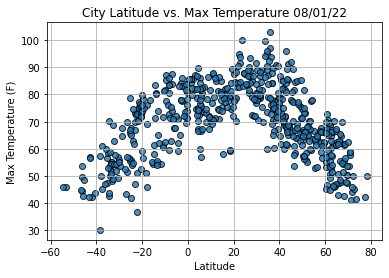

In [15]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)



# Save the figure.

plt.savefig("weather_data/Fig1.png")


# Show plot.

plt.show()

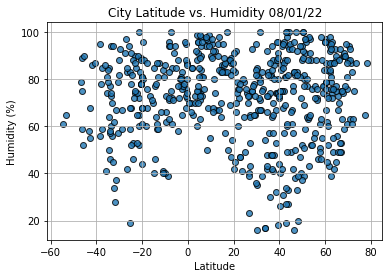

In [16]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)



# Save the figure.

plt.savefig("weather_data/Fig2.png")



# Show plot.

plt.show()

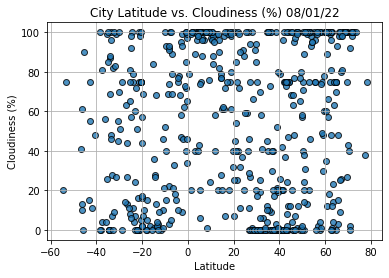

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")


# Show plot.

plt.show()

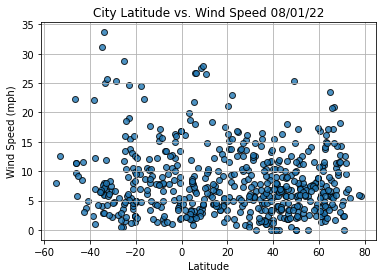

In [18]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig4.png")


# Show plot.

plt.show()

In [51]:
# Import linregress

from scipy.stats import linregress




# Create a function to create and perform linear regression on the weather data

# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    

    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    
    
    # Create a scatter plot of the x and y values. 

    plt.scatter(x_values, y_values)

    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope. 

    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equeation and add its coordinates.

    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")

    plt.xlabel('Latitude')
    
    plt.title(title)

    plt.ylabel(y_label)

    plt.show()

In [52]:
# Create new DataFrame

index13 = city_data_df.loc[13]

index13

City                      Rikitea
Country                        PF
Date          2022-08-02 05:11:42
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    73.27
Humidity                       74
Cloudiness                     24
Wind Speed                   24.7
Name: 13, dtype: object

In [53]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

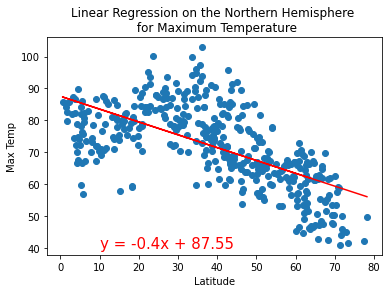

In [54]:
# Linear regression on the Northern Hemisphere for Max Temp

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10, 40))

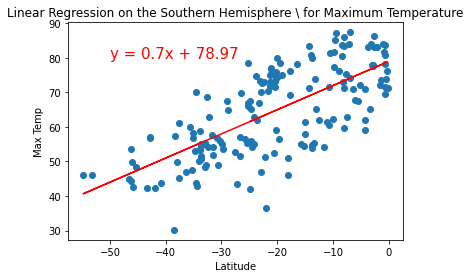

In [58]:
# Linear regression on the Southern Hemisphere for Max Temp

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50, 80))

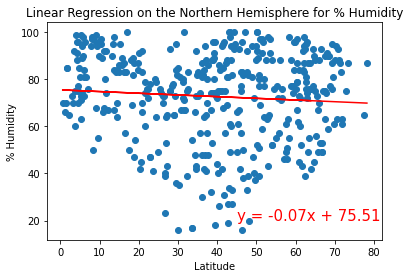

In [69]:
# Linear regression on the Northern Hemisphere for Humidity

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(45, 20))

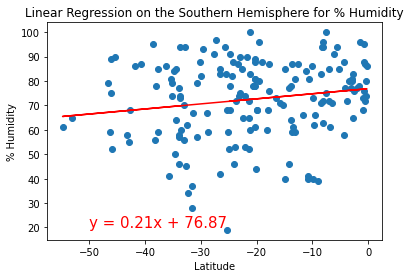

In [64]:
# Linear regression on the Southern Hemisphere for Humidity

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50, 20))

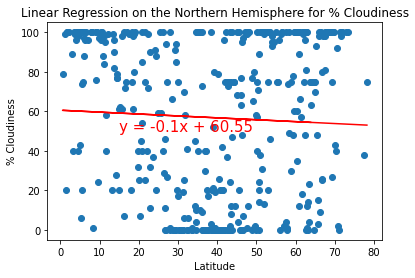

In [73]:
# Linear regression on the Northern Hemisphere for Cloudiness

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(15, 50))

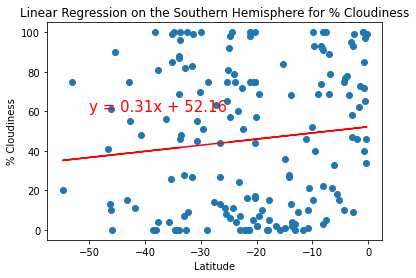

In [74]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

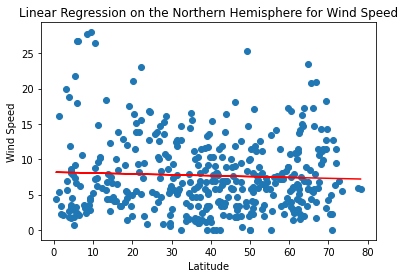

In [75]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))